NAME: Venkata Subbaraju Sagi

# Simple Descriptive Statistics on breast cancer data

### Objectives
* Basic numpy operations to access data
* Basic plotting of subsets of data
* Simple descriptive statistics
* Do not save work within the ml_practices folder
  + create a folder in your home directory for assignments, and copy the temples there  

### General References
* [Sci-kit Learn Breast Cancer Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
* [Numpy Reference](https://docs.scipy.org/doc/numpy/reference/index.html)
* [Summary of matplotlib](https://matplotlib.org/3.1.1/api/pyplot_summary.html)
  + [Plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html)
  + [Boxplots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html)
  + [Histograms](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist)
  + [Scatter plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)
  + [Colormap Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


# LOAD BREAST CANCER DATA SET

In [0]:
"""
Loaded the dataset into the bc_dataset variable, by calling the 
load_breast_cancer() function imported from sklearn.datasets.
Then displayed the bc_dataset object's list of keys. bc_dataset
is a dictionary object.
"""
# TODO
bc_dataset = load_breast_cancer()
print("Breast Cancer Dataset Object Keys: ")
print(bc_dataset.keys())

Breast Cancer Dataset Object Keys: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


### Dataset Details
The `bc_dataset` variable is a dictionary with multiple fields:
* `data` : m by n numpy array of the n observed feature values, for each of the m samples  
* `target` : m by 1 numpy array of samples' classification as either malignant (i.e. 0) or benign (i.e. 1)  
* `target_names` : 2 by 1 numpy array of the possible tumor classifications  
* `DESCR` : string containing a detailed description of the dataset  
* `feature_names` : n by 1 numpy array of the names of the feature variables  
* `filename` : string containing the absolute path to where the file containing all the data information is located on the local system  


In [0]:
""" 
Printed out the description of the data, by accessing the 
'DESCR' field
"""
print("Data Description: ")
print(bc_dataset['DESCR'])

Data Description: 
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 

## SETUP USEFUL VARIABLES

In [0]:
"""
Storeed the names of the features and the names 
of the target classes, into the variables
feature_names and target_names respectively.
"""
feature_names = bc_dataset['feature_names'] # TODO
target_names = bc_dataset['target_names'] # TODO

""" 
Printing the list of feature names and target names
"""
print("Names of Features:")
print(list(feature_names))

print("Target Names:")
print(list(target_names))





Names of Features:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Target Names:
['malignant', 'benign']


In [0]:
""" 
Created variables for the feature and target data 
The X variable is a numy array containing the data measured 
for each feature for each sample. Each column of X is a 
different feature for all the samples. Each row of X is a 
different sample with all its features.
The y variable is a numpy array containing the classification 
for each sample. A sample tumor is either Benign or Malignant.
""" 

# TODO
X = bc_dataset['data']

y = bc_dataset['target'] 

""" TODO
Print the dimensions of the X and y variables respectively
"""
print("Dimensions of X: ")
print(X.shape)
print("")

print("Dimensions of Y:")
print(y.shape)

#print(type(X))
#print(type(y))




#print(X[0])
#print(y)

#dataframe = pd.DataFrame.from_records(X)
#print(dataframe)

Dimensions of X: 
(569, 30)

Dimensions of Y:
(569,)


In [0]:
""" 
Stored the number of samples and the number of features, by
accessing the values from the shape of X
"""
nsamples = X.shape[0] # TODO
nfeatures = X.shape[1] # TODO

""" 
printing the number of samples and numberof features respectively
"""
print("Number of samples in the dataset : ", nsamples)

print("Number of Features in the dataset: ", nfeatures)


Number of samples in the dataset :  569
Number of Features in the dataset:  30


## SELECT SUBSET OF FEATURES
Not all available data is necessary or useful for making predictions and classifying observations. There are numerous feature selection algorithms that exist. For now we are going to arbitrarly select mean radius, mean area, mean concavity, and mean symmetry as our predictor variables. We will not yet be performing any predictions in this Project; rather this term is used to conveniently distinuguish this subset of features from the full set of features.

In [0]:
""" 
Feature Column Indices
The values observed for each feature resides within a particular 
column of the feature matrix, X. For example, column 0 contains the 
values of the mean radius for each observation, the column at index 
3 contains the values for the mean area, and so on.
"""
mean_radius_idx = 0
mean_area_idx = 3
mean_concavity_idx = 6
mean_symmetry_idx = 8

"""
Creating a list of the select subset of features
"""
predictors = [mean_radius_idx, mean_area_idx, mean_concavity_idx, mean_symmetry_idx]

"""
Creating a variable, storing the number of predictors
"""
npredictors = len(predictors) # TODO

print("number of Predictors : ",npredictors)

"""
Creating a list of corresponding names for the selected set of features.
This is conveniently done using list comprehension
"""
pred_names = [name for name in bc_dataset.feature_names[predictors] ]# TODO

"""
Print the list of predictor names
"""
print("Predictor Feature Names:")
print(pred_names)


number of Predictors :  4
Predictor Feature Names:
['mean radius', 'mean area', 'mean concavity', 'mean symmetry']


## BASIC HISTOGRAMS OF FEATURES

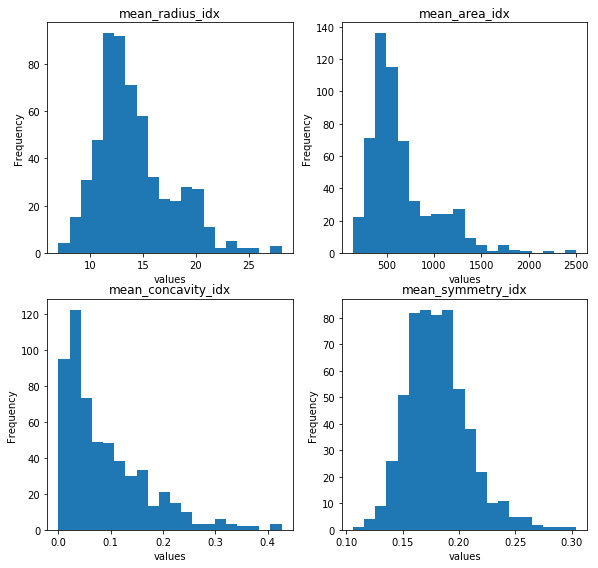

In [0]:
""" 
HISTOGRAMS OF THE CHOSEN PREDICTOR FEATURES
 
"""

FIGURESIZE = (10,6)
FONTSIZE = 18

plt.figure(figsize=FIGURESIZE)
plt.subplot(2,2,1)
plt.hist(X[:,0],20)
plt.xlabel('values')
plt.ylabel('Frequency')
plt.title(r'mean_radius_idx')
plt.subplot(2,2,2)
plt.hist(X[:,3],20)
plt.xlabel('values')
plt.ylabel('Frequency')
plt.title(r'mean_area_idx')
plt.subplot(2,2,3)
plt.hist(X[:,6],20)
plt.xlabel('values')
plt.ylabel('Frequency')
plt.title(r'mean_concavity_idx')
plt.subplot(2,2,4)
plt.hist(X[:,8],20)
plt.xlabel('values')
plt.ylabel('Frequency')
plt.title(r'mean_symmetry_idx')
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(top=1.30)

Text(0.5, 1.0, 'Counts of Each Target Variables')

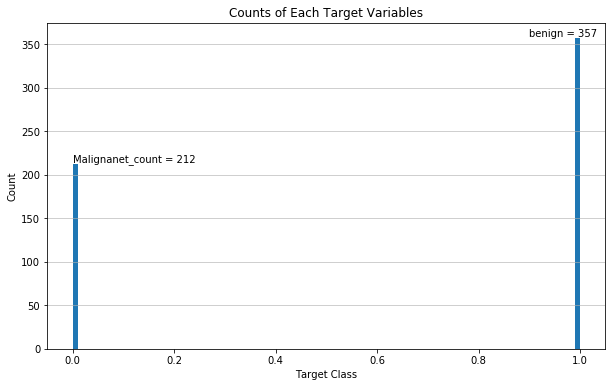

In [0]:
"""
Created a histogram or barplot for the counts
for each target class
"""
plt.figure(figsize=FIGURESIZE)
plt.hist(y,bins = 100)
plt.grid(axis='y', alpha=0.75)
plt.text(0, 215, r'Malignanet_count = 212')
plt.text(0.9,359, r'benign = 357')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title(r'Counts of Each Target Variables')




## BASIC BOXPLOTS OF FEATURES
Boxplots or box-and-whisker plots are used to obtain a perspective of the distribution of the data.
The box within the figure displays the 25th percentile (Q1), the median, and the 75th percentile (Q3) of the data. The range between the 75th percentile value and the 25th percentile value is the interquartile range (IQR = Q3 - Q1). The end of bottom line is Q1 - 1.5 * IQR. The end of top line is Q3 + 1.5 * IQR. Anything beyond the lines, the circles, are suggested outliers.  
<center><img src="ml_practices/imports/hws/hw1/boxplot_diagram.png" style="width:30%;height:30%"><\center>

One can use the `boxplot(data_values, labels=[name])` to generate a boxplot. `data_values` would be the set of observed values for a paritucular feature and `labels` should be provided as a list, with the name of the feature, in place of `name`.

Text(0.5, 1.0, 'mean_symmetry_idx')

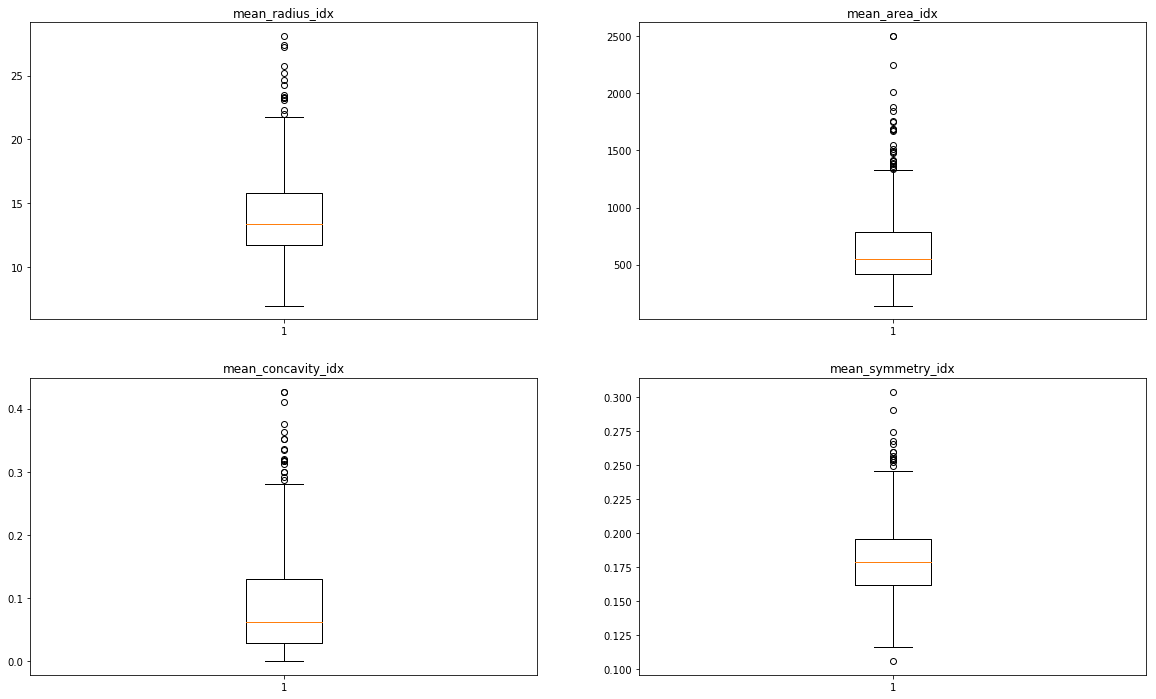

In [0]:
""" 
BOXPLOTS OF THE CHOSEN PREDICTOR FEATURES
 
"""
plt.figure(figsize=(FIGURESIZE[0]*2,FIGURESIZE[1]*2))
plt.subplot(2,2,1)
plt.boxplot(X[:,0])
plt.title(r'mean_radius_idx')
plt.subplot(2,2,2)
plt.boxplot(X[:,3])
plt.title(r'mean_area_idx')
plt.subplot(2,2,3)
plt.boxplot(X[:,6])
plt.title(r'mean_concavity_idx')
plt.subplot(2,2,4)
plt.boxplot(X[:,8])
plt.title(r'mean_symmetry_idx')


#print(X.shape)

## DESCRIPTIVE STATISTICS

In [0]:

""" 
Created a separate variable of the data from the 
predictors
"""
Xpreds = X[:, predictors]

#print(Xpreds.shape)

"""
Checking if any values are NaN (not a number)
"""
np.any(np.isnan(X[:, predictors]))


False

In [0]:
""" 
Computed the following descriptive statistics of the 
features ignoring NaN values, using numpy:
mean, median, standard deviation, min, and max

Compute and print the results
"""

print(Xpreds.shape)

print("Mean:")
print(np.mean(X, axis = 0))

print("Median: ")
print(np.median(X,axis = 0))

print("Standard Deviation: ")
print(np.std(X,axis = 0))

print("Min: ")
print(np.min(X,axis = 0))

print("Max: ")
print(np.max(X,axis = 0))

(569, 4)
Mean:
[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
Median: 
[1.337e+01 1.884e+01 8.624e+01 5.511e+02 9.587e-02 9.263e-02 6.154e-02
 3.350e-02 1.792e-01 6.154e-02 3.242e-01 1.108e+00 2.287e+00 2.453e+01
 6.380e-03 2.045e-02 2.589e-02 1.093e-02 1.873e-02 3.187e-03 1.497e+01
 2.541e+01 9.766e+01 6.865e+02 1.313e-01 2.119e-01 2.267e-01 9.993e-02
 2.822e-01 8.004e-02]
Standard Deviation: 
[3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.0200

## FEATURE CORRELATIONS
It's useful to know the correlation between various features, as well as each feature and the predicted label. Feature correlation is useful for feature selection and understanding the relationship between multiple variables within a dataset. Correlation is either positive, negative, or zero. When two features increase simultaneously, they are positively correlated. When one feature increases while the other decreases, the features are negatively correlated. Zero correlation is when there is no relationship between the features. Correlation is on the range -1 (perfect negative correlation) and 1 (pefect positive correlation).  
We can construct scatter plots of one feature versuses another to observe linear or nonlinear relationships.

Complete the following set of scatter plots:
<center><img src="ml_practices/imports/hws/hw1/scatterplots.png"  style="width:50%;height:50%"><\center>

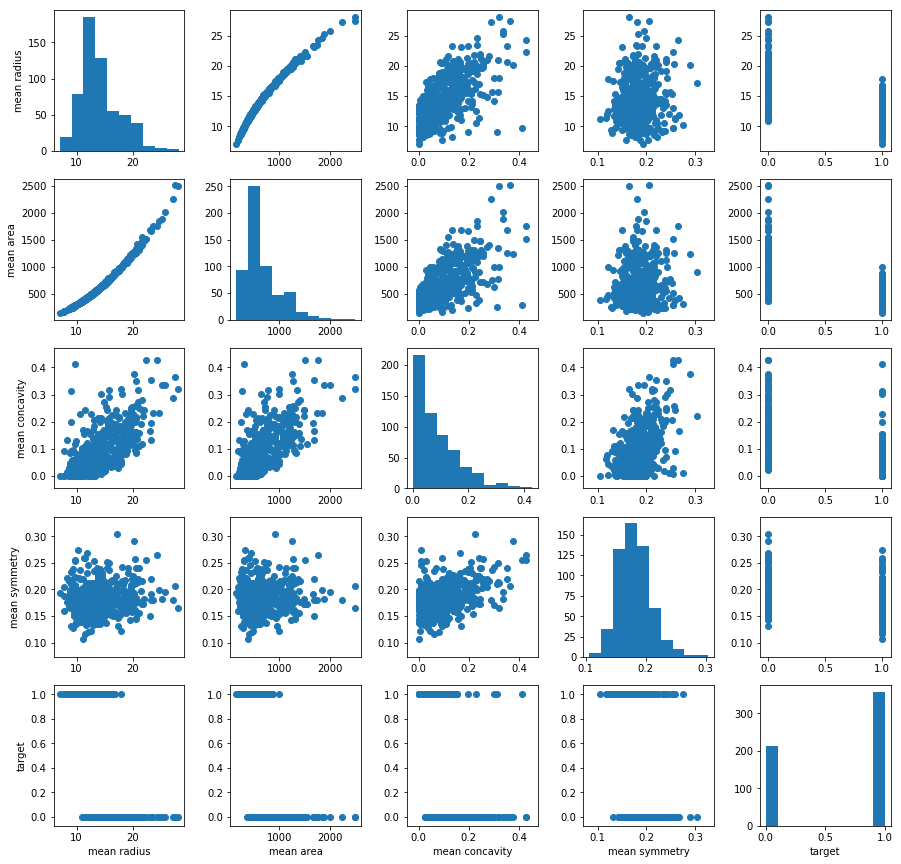

In [0]:
"""
Using the scatter plot function, construct plots depicting the
correlation between all pairings of the selected predictor features
and between all predictors and the determined target.
The figure will contain r by r subplots, where r = npredictors + 1.
Where subplot(i,j) is a scatter plot of the feature i versus feature j.
When i == j, plot the histogram of feature i instead of a scatter plot.
We are also interested in the correlation between each of the features 
and the target classification, thus we will combine the predictors matrix
and the target vector into one large matrix for convenience.
"""
# Append the y to the end of the matrix of predictors
Xycombo = np.append(Xpreds, y.reshape(-1, 1), axis=1)

# Append the name 'target' to the end of the list of predictor names
Xycolnames = pred_names + ['target']

# Create the scatter plots
fig, axs = plt.subplots(npredictors+1, npredictors+1, figsize=(15, 15))
fig.subplots_adjust(wspace=.35)
for f1 in range(npredictors+1):
    for f2 in range(npredictors+1):
        if f1 == f2:
            axs[f2][f1].hist(Xycombo[:,f1])
        else:
            axs[f2][f1].scatter(Xycombo[:,f1],Xycombo[:,f2])   
          
        # include labels only when necessary
        if f1 == npredictors:
            axs[f1, f2].set_xlabel(Xycolnames[f2])
        if f2 == 0:
            axs[f1, f2].set_ylabel(Xycolnames[f1])

## IMAGES AND COLORMAPS
Create a colormap plot of the correlations between the 
all the predictors and the target

(569, 5)
(5, 5)
[[ 1.          0.98735717  0.67676355  0.14774124 -0.73002851]
 [ 0.98735717  1.          0.68598283  0.15129308 -0.70898384]
 [ 0.67676355  0.68598283  1.          0.50066662 -0.69635971]
 [ 0.14774124  0.15129308  0.50066662  1.         -0.33049855]
 [-0.73002851 -0.70898384 -0.69635971 -0.33049855  1.        ]]


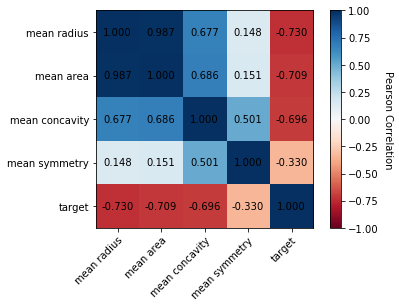

In [0]:
""" 
Generating a figure that plots the a correlation matrix
as a colormap.
PARAMS:
    corrs: matrix of correlations between the features
    varnames: list of the names of each of the features 
              (e.g. the column names)
"""
def correlationmap(corrs, varnames):
    nvars = corrs.shape[0]
    
    # create the figure and plot the correlation matrix
    fig, ax = plt.subplots()
    im = ax.imshow(corrs, cmap='RdBu', vmin=-1, vmax=1)
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Pearson Correlation", rotation=-90, va="bottom")
    
    # Specify the row and column ticks and labels for the figure
    ax.set_xticks(range(nvars))
    ax.set_yticks(range(nvars))
    ax.set_xticklabels(varnames)
    ax.set_yticklabels(varnames)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(nvars):
        for j in range(nvars):
            text = ax.text(j, i, "%.3f" % corrs[i, j],
                           ha="center", va="center", color="k")
# END DEF correlationmap ----------------------------------------------
            

""" 
Computed the Pearson correlation between the columns of Xycombo using
the numpy function corrcoef(). The corrcoef() function performs the 
the pairwise correlation on the rows of a matrix, thus you will need to
transpose the input.
""" 

#Xycombo = Xycombo.transpose()

#df = pd.DataFrame(Xycombo)
#print(df)
print(Xycombo.shape)
Xycorrs = np.corrcoef(Xycombo,rowvar=False)

""" 
Call the function defined above, correlationmap(), to generate a 
colormap plot of the correlations between columns of the Xycombo matrix.
Mke sure to read any provided code
"""
print(Xycorrs.shape)
print(Xycorrs)

correlationmap(Xycorrs, Xycolnames)